# Learning causal Bayes nets using variational autoencoders

Learning cause-effect mechanisms among a set of random variables is not only of great epistemological interest, but also a fascinating statistical problem. 


The relevant code can be found [here](https://github.com/dirmeier/dag-gnn).

Feedback and comments are welcome!

In [1]:
suppressMessages({
    library(dplyr)
    library(igraph)    
    library(ggraph)
    library(tidyverse)
    library(colorspace)
    library(patchwork)
    
    library(pcalg)
    library(daggnn)  
})

In [266]:
n <- 1000
p <- 7

In [212]:
set.seed(123)
dag <- pcalg::randomDAG(p, prob = 0.2)

In [213]:
A <- dag %>%
    igraph::graph_from_graphnel() %>%
    igraph::as_adj() %>%
    as.matrix()

In [214]:
ordering <- sample(1:p)
A <- A[ordering ,ordering]
colnames(A) <- rownames(A) <- LETTERS[1:p]

In [215]:
A

,A,B,C,D,E,F,G
A,0,0,0,0,0,1,0
B,0,0,1,0,0,0,0
C,0,0,0,0,1,0,0
D,0,0,0,0,0,0,0
E,0,0,0,0,0,1,0
F,0,0,0,0,0,0,0
G,0,0,1,0,0,1,0


In [216]:
igraph::graph_from_adjacency_matrix(A, weighted=TRUE) %>%
  is.dag()

[1] TRUE

In [217]:
plot.adj <- function(adj) {    
    igraph::graph_from_adjacency_matrix(adj, weighted = TRUE) %>%
    ggraph::ggraph(layout = "sugiyama") +
    ggraph::geom_edge_link(
      ggplot2::aes(
        start_cap = label_rect(node1.name),
        end_cap = label_rect(node2.name)
      ),
      arrow = arrow(length = unit(4, "mm"))
    ) +
    ggraph::geom_node_text(ggplot2::aes(label = name), size = 5) +
    ggraph::scale_edge_color_viridis("Coefficient", end = .8, option = "B") +
    ggraph::scale_edge_width("Direction", range = c(.5, 2), limits = c(.5, 1)) +
    ggraph::theme_graph()
} 

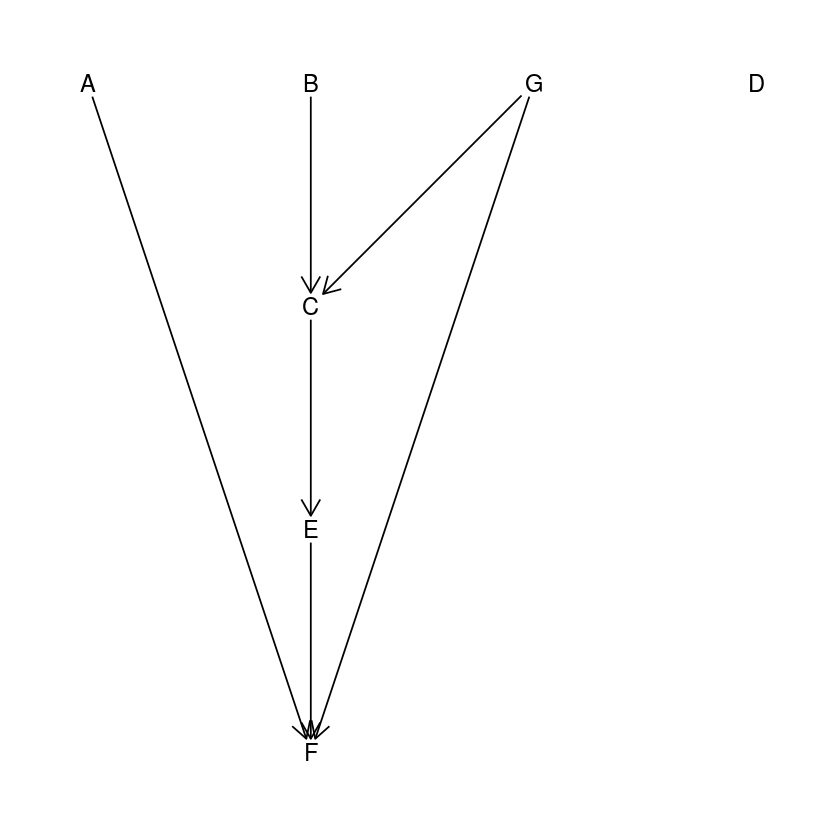

In [218]:
plot.adj(A)

In [247]:
Z <- matrix(rnorm(n * p, 0, 0.1), n)

In [248]:
X <- Z %*% solve(diag(p) - A)
X <- as.data.frame(X)

In [268]:
sufficient <- list(C = cor(X), n = nrow(X))
bn.pc <- pc(sufficient, indepTest = gaussCItest,labels = colnames(X), alpha = 0.05)

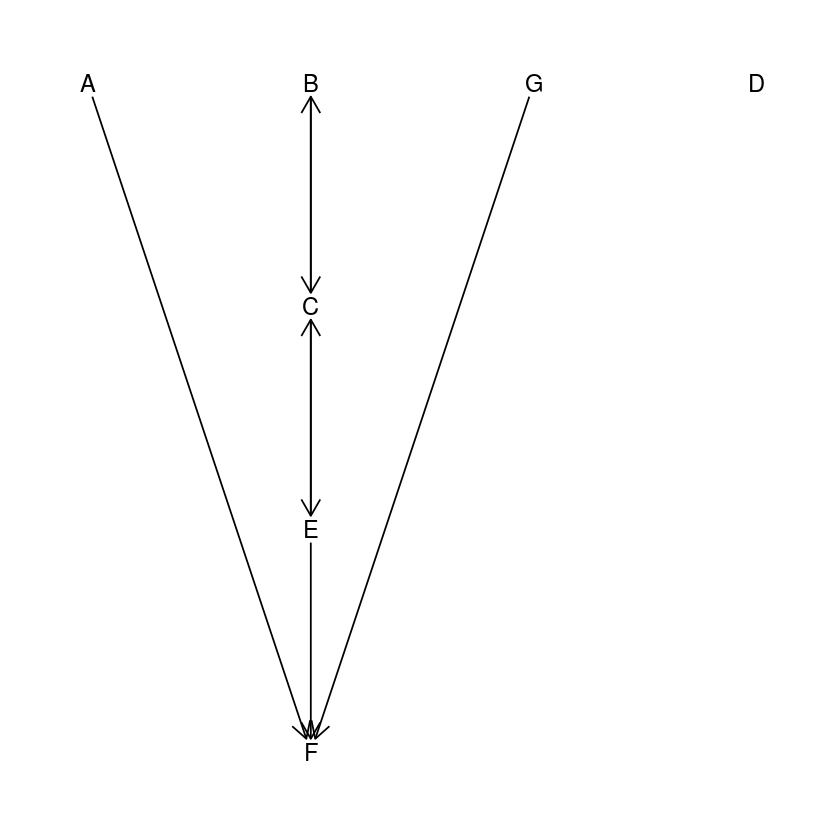

In [274]:
pcalg::getGraph(bn.pc)   %>%
    igraph::graph_from_graphnel() %>%
    igraph::as_adj() %>%
    as.matrix() %>% plot.adj()

In [304]:
daggnn::optim(X)

ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘optim’ for signature ‘"data.frame"’


In [283]:
Z <- matrix(rcauchy(n * p, 0, 1), n)
X <- as.data.frame(Z %*% solve(diag(p) - A))

In [289]:
bn.lingam <- pcalg::lingam(X)$Bpruned

In [291]:
colnames(bn.lingam) <- rownames(bn.lingam) <- colnames(X)

In [303]:
?lingam

In [297]:
g1 <- as(t(bn.lingam), "graphNEL") ## convert to graph
cpdag1 <- dag2cpdag(g1)

In [299]:
cpdag1

A graphNEL graph with directed edges
Number of Nodes = 7 
Number of Edges = 6 

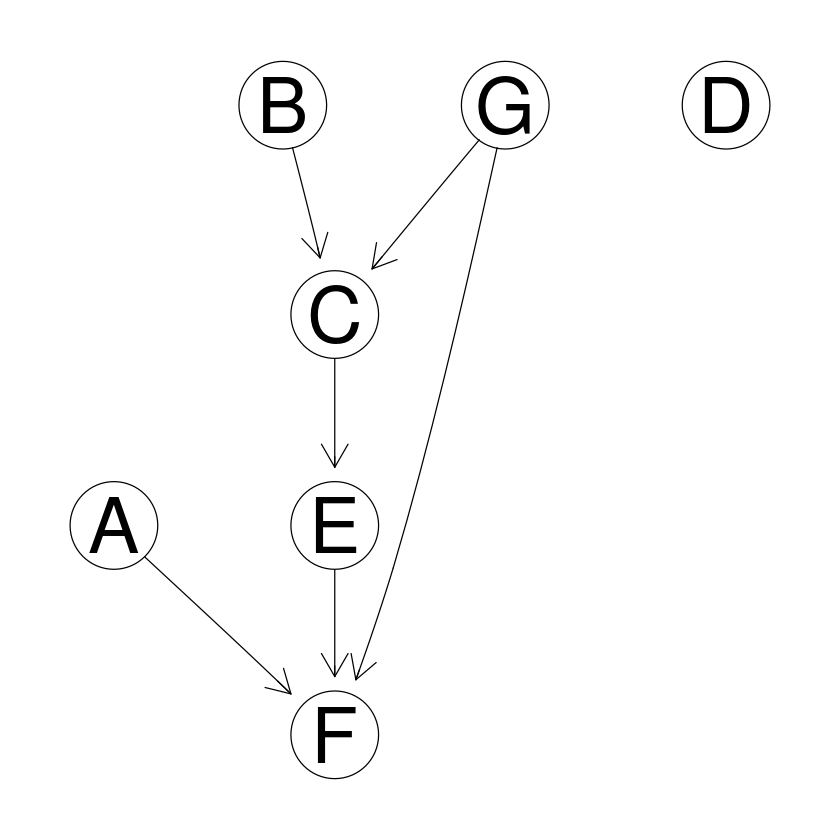

In [300]:
plot(cpdag1)

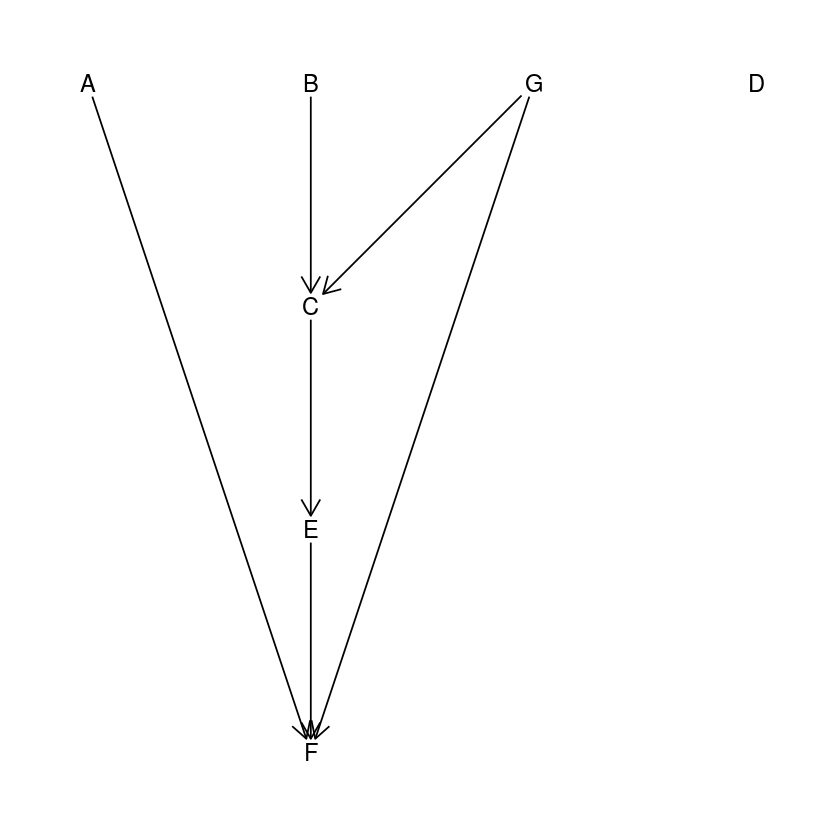

In [294]:
plot.adj(A)